In [178]:
import pandas as pd
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Synapse_Aging/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed|gis')), axis = 1, inplace = True)

In [180]:
cols = [col for col in quant.columns if "Intensity" in col]

In [181]:
quantnorm = OA.quantile_transform(quant, cols)

In [182]:
SI = OA.summedintensities(quantnorm)

/home/robbe/ionbot/OxiAnalysis.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantexox.drop(list(quantexox.filter(regex = 'Detection Type')), axis = 1, inplace = True)


In [183]:
TSI = SI.set_index("Modifications").T

In [184]:
TSI.drop(["Gene Names","Organism","Oxmod?"], inplace=True)

In [185]:
traits = pd.read_csv("/home/robbe/ionbot/Ageing_study/0.Traits.csv")

In [186]:
traits

,SampleID,Sex,Age,PMI,Batch,RunOrder
0,ag_02_gis,0.7,46.7,23.6,1,1
1,ag_03_0247,1.0,55.0,16.0,1,2
2,ag_04_0210,0.0,44.0,27.0,1,3
3,ag_05_0306,0.0,52.0,36.0,1,4
4,ag_06_0120,0.0,42.0,42.0,1,5
...,...,...,...,...,...,...
88,ag_99_0193,1.0,50.0,11.0,3,89
89,ag_100_0081,1.0,62.0,14.0,3,90
90,ag_101_0479,1.0,44.0,13.0,3,91
91,ag_102_0463,1.0,49.0,16.0,3,92


In [187]:
TSI.reset_index(inplace=True)

In [188]:
TSI["index"] = TSI["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [189]:
data = pd.merge(TSI, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [190]:
data2 = data.filter(["[1917]Formylasparagine[H]", "[1918]Carbonyl[A]", "[1918]Carbonyl[S]", "[1925]Delta:O(4)[W]", "[345]Trioxidation[C]", "[345]Trioxidation[F]", "[354]Nitro[Y]", "[35]Oxidation[C]", "[35]Oxidation[I]", "[35]Oxidation[P]", "[35]Oxidation[Q]", "[35]oxidation[M]", "[360]Pro->Pyrrolidinone[P]", "[368]Cys->Dha[C]", "[936]Chlorination[Y]", "Age", "Sex", "Batch"], axis=1).reset_index()

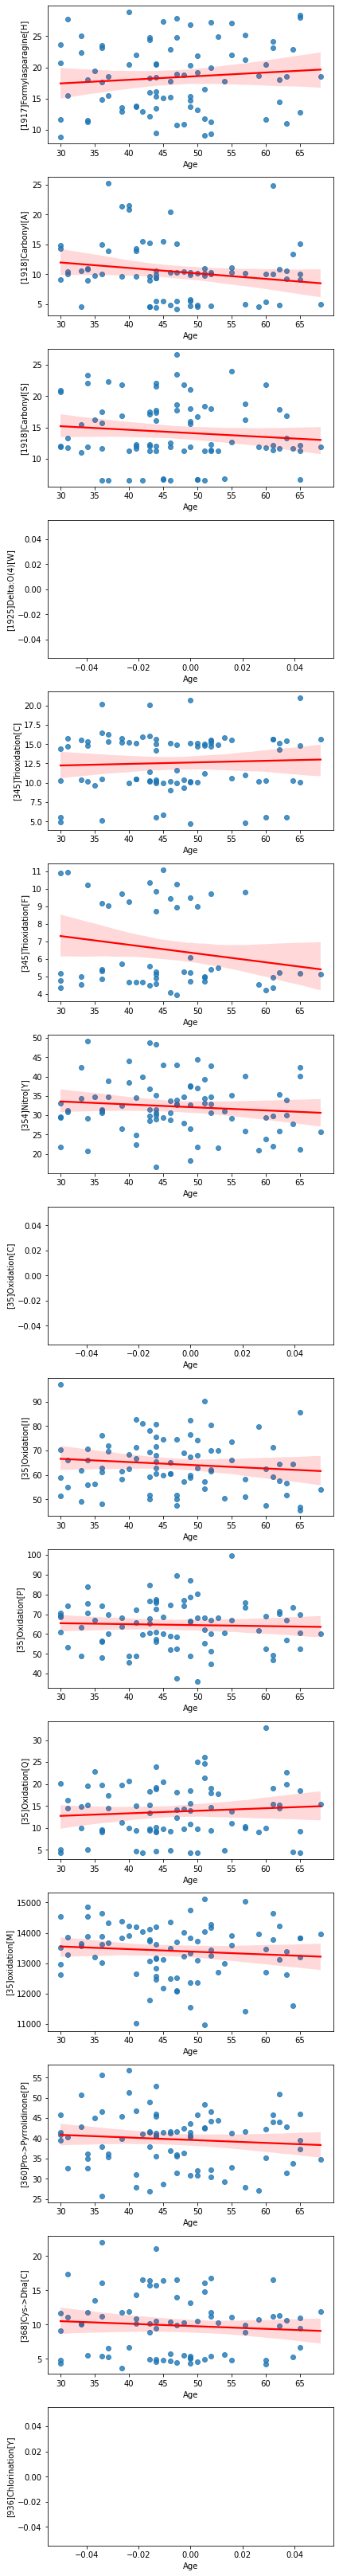

In [200]:
import numpy as np
from scipy import stats
# Define the columns to plot
data2 = data2.replace(0, np.nan)
columns_to_plot = data2.columns[1:16]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,3*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data2['Age'],data2[col])
    sns.regplot(x='Age', y=col, data=data2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'})
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.show()

In [192]:
forPCA = data.reset_index()

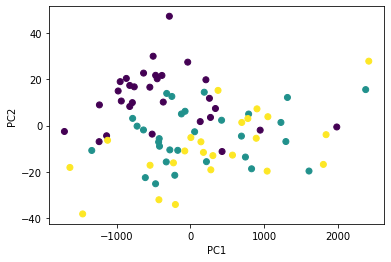

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = forPCA.drop(["SampleID", "Sex", "Age", "PMI", "Batch", "RunOrder"], axis=1)
y = forPCA["Batch"]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.show()